In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

from kneed import KneeLocator

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../datasets/headlines.csv',header = None)
df.head()


0
0  Budget to set scene for election\n \n Gordon B...
1  Army chiefs in regiments decision\n \n Militar...
2  Howard denies split over ID cards\n \n Michael...
3  Observers to monitor UK election\n \n Minister...
4  Kilroy names election seat target\n \n Ex-chat...

<h1>Clear Text</h1>

In [3]:
sword = stopwords.words('english')
wnl = WordNetLemmatizer()
sword.extend(['said','made','make','new','one','say'])

In [4]:
#lemmetizer

def lemmatize(word):
    tag = pos_tag([word])
    pos = 'n'
    if tag[0][1].startswith('N'):
        pos = 'n'
    if tag[0][1].startswith('V'):
        pos = 'v'
    if tag[0][1].startswith('J'):
        pos = 'a'
    if tag[0][1].startswith('R'):
        pos = 'r'
    return(wnl.lemmatize(word,pos = pos))

In [5]:
#clearing data

def clean_text(sent):
    token1 = word_tokenize(sent)
    token2 = [token for token in token1 if token.isalpha()]
    token3 = [token.lower() for token in token2 if token.lower() not in sword]
    token4 = [lemmatize(token) for token in token3]

    return token4

In [6]:
cleaned = df[0].apply(clean_text)

In [7]:
final_text = ' '.join(cleaned.sum())
final_text

'budget set scene election gordon brown seek put economy centre labour bid third term power delivers ninth budget gmt expect stress importance continued economic stability low unemployment interest rate chancellor expect freeze petrol duty raise stamp duty threshold conservative lib dems insist voter face high tax labour treasury official giveaway mr brown thought spare increase stamp duty threshold freeze petrol duty extension tax credit scheme poorer family possible help pensioner stamp duty threshold rise intend help first time buyer likely theme three main party general election manifesto ten year ago buyer much great chance avoid stamp duty close half million property england wale alone sell less since average uk property price double start threshold stamp duty increase tax credit result number property incur stamp duty rocket government tax take liberal democrat unveiled proposal raise stamp duty threshold february tory also thought likely propose increase threshold shadow chance

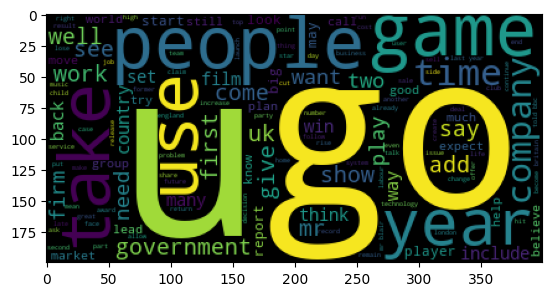

In [8]:
wc = WordCloud().generate(final_text)
plt.imshow(wc)

In [9]:
lemmatize('said')

'say'

<h1>Vectorization</h1>

In [10]:
tfidf = TfidfVectorizer(analyzer=clean_text)
x_new = tfidf.fit_transform(df[0])

In [11]:
x_new.shape

(2225, 21406)

<h1>Clusters</h1>

In [12]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k,random_state= 0 ,n_init='auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_)

Text(0.5, 0, 'K values')

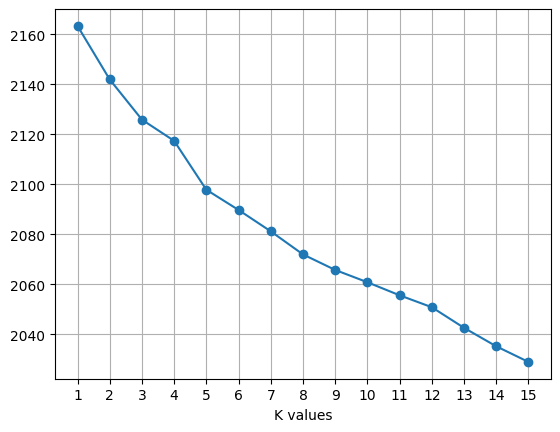

In [13]:


plt.plot(range(1,16),sse,marker = 'o')
plt.grid()
plt.xticks(range(1,16));
plt.xlabel('K values')


<h1>Kneed</h1>

In [14]:
kl= KneeLocator(range(1,16),sse,curve = 'convex',direction = 'decreasing')

In [15]:
kl.elbow

np.int64(5)

In [16]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

labels = km.fit_predict(x_new)

labels


array([4, 3, 4, ..., 3, 3, 3], shape=(2225,), dtype=int32)

<h1>Separating labels</h1>

In [35]:
km = KMeans(n_clusters=5,random_state=0,n_init='auto')
labels = km.fit_predict(x_new)


cleaned = pd.DataFrame(cleaned)

cleaned['label'] = km.labels_
cleaned

0  label
0     [budget, set, scene, election, gordon, brown, ...      4
1     [army, chief, regiment, decision, military, ch...      3
2     [howard, denies, split, id, card, michael, how...      4
3     [observer, monitor, uk, election, minister, in...      4
4     [kilroy, name, election, seat, target, show, h...      4
...                                                 ...    ...
2220  [india, open, sky, competition, india, allow, ...      3
2221  [yukos, bankruptcy, u, matter, russian, author...      3
2222  [survey, confirms, property, slowdown, governm...      3
2223  [high, fuel, price, hit, ba, profit, british, ...      3
2224  [u, trade, gap, hit, record, gap, u, export, i...      3

[2225 rows x 2 columns]

In [59]:
# zero = cleaned[cleaned['label' == 0]]
# ones = cleaned[cleaned['label' == 1]]
# twos = cleaned[cleaned['label' == 2]]
# three = cleaned[cleaned['label' == 3]]
# four = cleaned[cleaned['label' == 4]]
zeros = cleaned[cleaned['label']==0]
ones = cleaned[cleaned['label']==1]
twos = cleaned[cleaned['label']==2]
three = cleaned[cleaned['label']==3]
fours = cleaned[cleaned['label']==4]
zeros

0  label
72    [mp, issue, blackberry, threat, mp, thrown, co...      0
247   [game, warning, clearer, violent, video, game,...      0
300   [mp, issue, blackberry, threat, mp, thrown, co...      0
373   [uk, firm, uk, firm, embrace, internet, tradin...      0
928   [digital, uk, driven, net, tv, uk, adoption, d...      0
...                                                 ...    ...
1820  [news, corp, eye, video, game, market, news, c...      0
1861  [brussels, rap, mobile, call, charge, european...      0
2054  [make, office, work, mission, brighten, work, ...      0
2138  [orange, colour, clash, set, court, row, colou...      0
2149  [bt, offer, equal, access, rival, bt, move, po...      0

[378 rows x 2 columns]

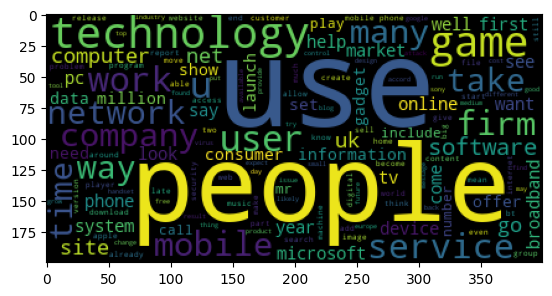

In [61]:
wc0 = WordCloud().generate(' '.join(zeros[0].sum()))
plt.imshow(wc0)

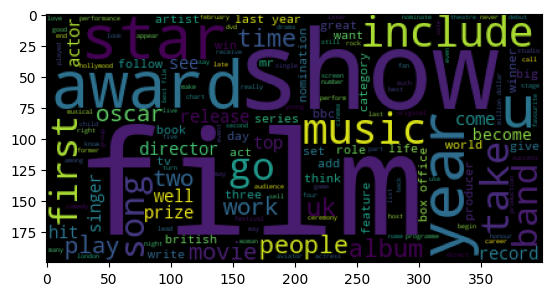

In [65]:
wc0 = WordCloud().generate(' '.join(ones[0].sum()))
plt.imshow(wc0)

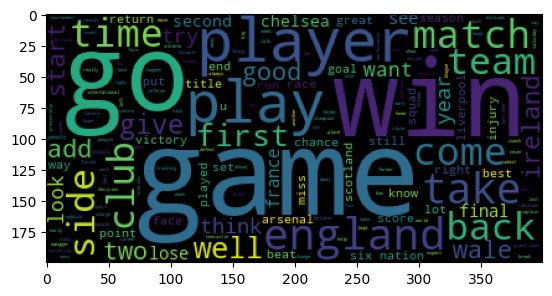

In [66]:
wc0 = WordCloud().generate(' '.join(twos[0].sum()))
plt.imshow(wc0)

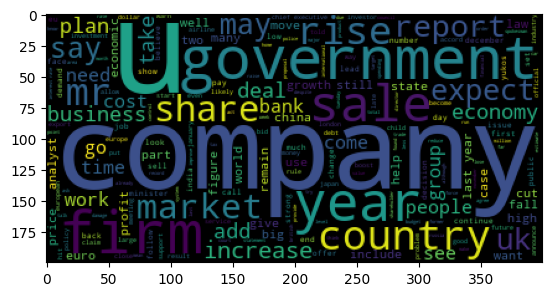

In [67]:
wc0 = WordCloud().generate(' '.join(three[0].sum()))
plt.imshow(wc0)

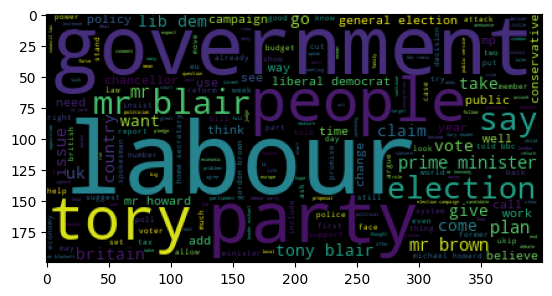

In [68]:
wc0 = WordCloud().generate(' '.join(fours[0].sum()))
plt.imshow(wc0)

In [72]:
cleaned['topic'] = cleaned['label'].map({0:'technologia',1:'movies',2:'sports',3:'finance',4:'politics'})
news_analysis = cleaned.drop('label',axis = 1)
news_analysis

0     topic
0     [budget, set, scene, election, gordon, brown, ...  politics
1     [army, chief, regiment, decision, military, ch...   finance
2     [howard, denies, split, id, card, michael, how...  politics
3     [observer, monitor, uk, election, minister, in...  politics
4     [kilroy, name, election, seat, target, show, h...  politics
...                                                 ...       ...
2220  [india, open, sky, competition, india, allow, ...   finance
2221  [yukos, bankruptcy, u, matter, russian, author...   finance
2222  [survey, confirms, property, slowdown, governm...   finance
2223  [high, fuel, price, hit, ba, profit, british, ...   finance
2224  [u, trade, gap, hit, record, gap, u, export, i...   finance

[2225 rows x 2 columns]

<h1>Predicting from another news</h1>

In [81]:
text = '''Of the 24 teams in the FIH junior men’s hockey World Cup beginning in Chennai and Madurai on Friday, the host will, undoubtedly, be at the centre of attraction.

The two-time champion (2001 & 2016) can’t complain much as it has had the best preparations coming into the competition.

As much as the Indian boys’, their head coach P.R. Sreejesh, too, will be under the radar for what he does and what he doesn’t.

In his first major assignment, the 37-year-old legendary India goalkeeper and two-time Olympic bronze medallist, appears ready for the challenge.

However, there are areas the Indian team should guard itself against. In the recently-concluded Sultan of Johor Cup in Kuala Lumpur, India could convert just eight of the 53 penalty corners it earned. Against Pakistan and Australia, it earned nine and eight PCs respectively, but converted only one.

'''

km.predict(tfidf.transform([text]))

array([2], dtype=int32)